<!--NAVIGATION-->
< [在matplotlib中创建三维图表](04.12-Three-Dimensional-Plotting.ipynb) | [目录](Index.ipynb) | [使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Geographic Data with Basemap

# 使用Basemap创建地理位置图表

> One common type of visualization in data science is that of geographic data.
Matplotlib's main tool for this type of visualization is the Basemap toolkit, which is one of several Matplotlib toolkits which lives under the ``mpl_toolkits`` namespace.
Admittedly, Basemap feels a bit clunky to use, and often even simple visualizations take much longer to render than you might hope.
More modern solutions such as leaflet or the Google Maps API may be a better choice for more intensive map visualizations.
Still, Basemap is a useful tool for Python users to have in their virtual toolbelts.
In this section, we'll show several examples of the type of map visualization that is possible with this toolkit.

数据科学中一个常见的可视化需求是处理地理数据。Matplotlib用来处理这类数据的主要工具是Basemap，这个工具是`mpl_toolkits`模块中的工具包之一。必须承认，Basemap有一点难用，而且通常很简单的图表也会花费比你期望的更长的时间来渲染。更加现代的解决方案例如leaflet或者谷歌地图API对于密集的地图展示来说可能是更好的选择。然而Basemap依旧是Python用户工具包中有用的工具。在本节中，我们会展示使用这个工具进行地图类型图表进行处理的一些例子。

> Installation of Basemap is straightforward; if you're using conda you can type this and the package will be downloaded:

安装Basemap也是很容易的；如果你使用conda进行包管理的话，你可以输入下面的命令来下载并安装它：

```
$ conda install basemap
```

> We add just a single new import to our standard boilerplate:

然后我们在标准的载入代码中加入一行：

译者注：安装完Basemap后，其依赖的proj4不会自动设置环境变量PROJ_LIB，你可以将这个环境变量设置到你的`$HOME/.bashrc`中，或像下面一样将环境变量设置到`<anaconda-home>/share/proj`。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB']=os.environ['HOME'] + '/anaconda3/share/proj/' # 如果你的anaconda安装目录不在这里，你可能需要修改
from mpl_toolkits.basemap import Basemap

> Once you have the Basemap toolkit installed and imported, geographic plots are just a few lines away (the graphics in the following also requires the ``PIL`` package in Python 2, or the ``pillow`` package in Python 3):

一旦你安装和载入了Basemap工具，地理图表距离你就只差几行代码了（下面的图像还需要Python 2的`PIL`包或Python 3的`pillow`包）：

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


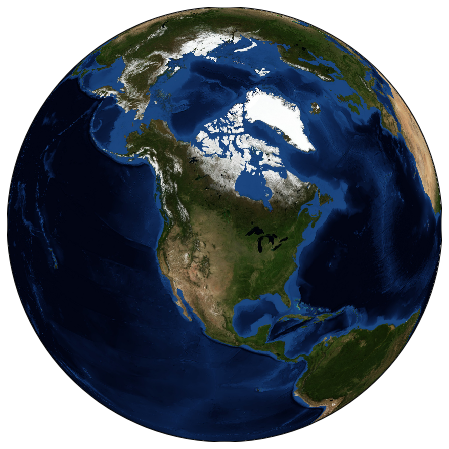

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

> The meaning of the arguments to ``Basemap`` will be discussed momentarily.

`Basemap`的参数含义我们很快会在后面介绍。

> The useful thing is that the globe shown here is not a mere image; it is a fully-functioning Matplotlib axes that understands spherical coordinates and which allows us to easily overplot data on the map!
For example, we can use a different map projection, zoom-in to North America and plot the location of Seattle.
We'll use an etopo image (which shows topographical features both on land and under the ocean) as the map background:

这里有用的是展示的地球不仅仅是一张图；它是一个具备完整功能的Matplotlib axes，并使用球面坐标系方便我们在地图上绘制我们的数据。例如我们可以使用不同的地图投射，放大北美区域然后绘制西雅图的位置。我们会使用etopo地形图（它会绘制出陆地和海底的地形特征）来作为地图的背景：

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


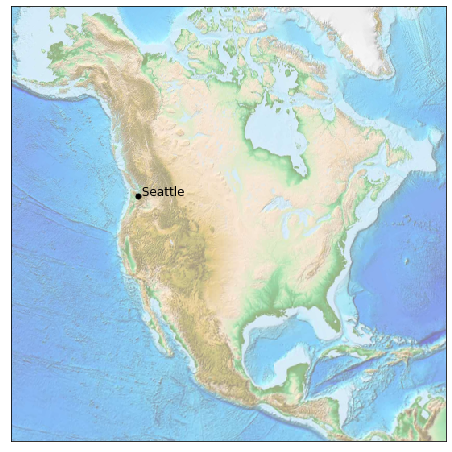

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# 将西雅图的经纬度转换为地图上的x和y坐标用来绘制点和文字
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

> This gives you a brief glimpse into the sort of geographic visualizations that are possible with just a few lines of Python.
We'll now discuss the features of Basemap in more depth, and provide several examples of visualizing map data.
Using these brief examples as building blocks, you should be able to create nearly any map visualization that you desire.

上面地图可视化的例子给你一个简要的介绍，使用Python简单的几行代码可以显示地图的内容。我们下面开始什么讨论Basemap的特性，当然也会提供一些例子对地图数据进行可视化。使用这些简单的例子作为基础，你应该可以创建任何地图类型的可视化图表。

## Map Projections

## 地图投射

> The first thing to decide when using maps is what projection to use.
You're probably familiar with the fact that it is impossible to project a spherical map, such as that of the Earth, onto a flat surface without somehow distorting it or breaking its continuity.
These projections have been developed over the course of human history, and there are a lot of choices!
Depending on the intended use of the map projection, there are certain map features (e.g., direction, area, distance, shape, or other considerations) that are useful to maintain.

使用地图时首先需要考虑的是采用什么样的投射。你可能已经听过这个事实，那就是将一个球面地图，比如说地球投射到一个平面上时，是不可能不产生扭曲以及破坏它的连续性的。人类的历史上出现过多种投射方式，因此你有许多不同的选择。取决于使用地图投射的目的，你需要决定哪些地图的特性（例如方向、面积、距离、形状或其他）应该被保留下来。

> The Basemap package implements several dozen such projections, all referenced by a short format code.
Here we'll briefly demonstrate some of the more common ones.

Basemap包实现了几十个这样的投射，所有的投射方式都使用缩写代码表示。我们这里会介绍几种最常见的投射方式。

> We'll start by defining a convenience routine to draw our world map along with the longitude and latitude lines:

首先定义一个函数来绘制带有经线和纬线的世界地图：

In [4]:
from itertools import chain

def draw_map(m, scale=0.2):
    # 绘制浮雕地图
    m.shadedrelief(scale=scale)
    
    # 经线和纬线绘制，并返回成两个字典
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # 获得经线和纬线的字典key
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # 设置所有经线和纬线样式
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Cylindrical projections

### 圆柱投射

> The simplest of map projections are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively.
This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles.
The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles.
In the following figure we show an example of the *equidistant cylindrical projection*, which chooses a latitude scaling that preserves distances along meridians.
Other cylindrical projections are the Mercator (``projection='merc'``) and the cylindrical equal area (``projection='cea'``) projections.

圆柱投射是最简单的地图投射方式，也就是将地球想象成一个圆柱，展开后经线和纬线分别处于垂直和水平方向，形成均匀的网格。这种投射方式在赤道附近工作的很理想，但是在两级会造成严重的扭曲。纬度线之间的间隔因不同圆柱投射而不同，导致保留的属性也不同，最终两级附近的扭曲也不相同。在下图中，我们采用了*等距圆柱投射*，这种投射使用纬度线将子午线分割成等距的部分。其他的圆柱投射还有墨卡托投射（`projection='merc'`）和圆柱等面积投射（`projection='cea')。

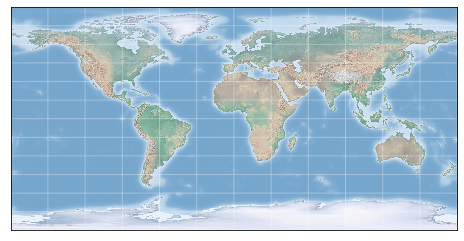

In [5]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

> The additional arguments to Basemap for this view specify the latitude (``lat``) and longitude (``lon``) of the lower-left corner (``llcrnr``) and upper-right corner (``urcrnr``) for the desired map, in units of degrees.

上图中Basemap的其他额外参数指定了图左下角（`llcrnr`）的纬度（`lat`）和经度（`lon`）以及图右上角（`urcrnr`）的纬度和经度，单位是角度。

### Pseudo-cylindrical projections

### 伪圆柱投射

> Pseudo-cylindrical projections relax the requirement that meridians (lines of constant longitude) remain vertical; this can give better properties near the poles of the projection.
The Mollweide projection (``projection='moll'``) is one common example of this, in which all meridians are elliptical arcs.
It is constructed so as to preserve area across the map: though there are distortions near the poles, the area of small patches reflects the true area.
Other pseudo-cylindrical projections are the sinusoidal (``projection='sinu'``) and Robinson (``projection='robin'``) projections.

伪圆柱投射不再要求子午线（经度线）是垂直的；这种方式在两级附近也能获得更好的结果。摩尔维特投射是其中一个常用的方法，这种方式中所有的子午线都是一段椭圆弧线。在摩尔维特投射中，面积属性得以保留：虽然在两极附近图像会产生扭曲，但是地图上的小块面积对应着真实的面积。其他的伪圆柱投射包括正弦投射（`projection='sinu'`）和罗宾森映射（`projection='robin'`）。

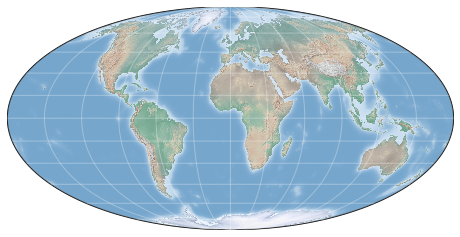

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

> The extra arguments to Basemap here refer to the central latitude (``lat_0``) and longitude (``lon_0``) for the desired map.

上图中Basemap的额外参数包括图像中央的维度（`lat_0`)和经度（`lon_0`）。

### Perspective projections

### 透视投射

> Perspective projections are constructed using a particular choice of perspective point, similar to if you photographed the Earth from a particular point in space (a point which, for some projections, technically lies within the Earth!).
One common example is the orthographic projection (``projection='ortho'``), which shows one side of the globe as seen from a viewer at a very long distance. As such, it can show only half the globe at a time.
Other perspective-based projections include the gnomonic projection (``projection='gnom'``) and stereographic projection (``projection='stere'``).
These are often the most useful for showing small portions of the map.

透视投射需要首先选择一个透视点，相当于你在太空中给地球拍照片（对于某些投射来说，透视点也可能在地球内）。其中最常见的例子是正投射（`projection='ortho'`），你可以认为是在太空中一个很远的距离展示地球的半个球面。其他的透视投射包括球心投射（`projection='gnom'`）和立体投射（`projection='stere'`）。

> Here is an example of the orthographic projection:

下面是正投射的一个例子：

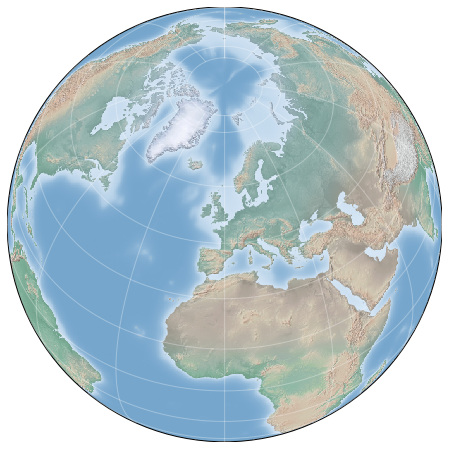

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### Conic projections

### 圆锥投射

> A Conic projection projects the map onto a single cone, which is then unrolled.
This can lead to very good local properties, but regions far from the focus point of the cone may become very distorted.
One example of this is the Lambert Conformal Conic projection (``projection='lcc'``), which we saw earlier in the map of North America.
It projects the map onto a cone arranged in such a way that two standard parallels (specified in Basemap by ``lat_1`` and ``lat_2``) have well-represented distances, with scale decreasing between them and increasing outside of them.
Other useful conic projections are the equidistant conic projection (``projection='eqdc'``) and the Albers equal-area projection (``projection='aea'``).
Conic projections, like perspective projections, tend to be good choices for representing small to medium patches of the globe.

圆锥投射将地图投影到一个圆锥上，然后再展开。这会提供非常优秀的局部属性，但是远离圆锥焦点的区域会严重变形。里面最常用的是兰伯特等角圆锥投影（`projection='lcc'`），我们在前面的北美地图例子中已经使用到。它使用两条平行纬度线（在Basemap中用`lat_1`和`lat_2`指定），它们的距离和球面保持一致，因此两条纬度线之间的比例将会减小而之外的比例将会增大。其他圆锥投射包括等距圆锥映射（`projection='eqdc'`）和阿尔伯思投射或称等积圆锥投射（`projection='aea'`）。圆锥投射就像透视投射一样，适用于小区域或中等区域的球面投射。

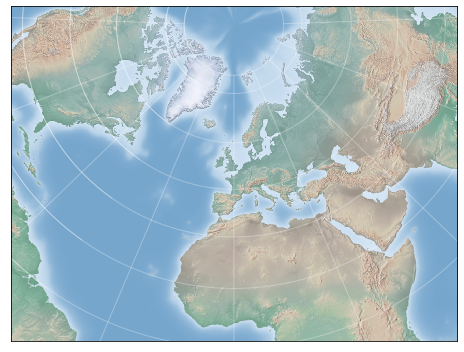

In [8]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

### Other projections

### 其他投射

> If you're going to do much with map-based visualizations, I encourage you to read up on other available projections, along with their properties, advantages, and disadvantages.
Most likely, they are available in the [Basemap package](http://matplotlib.org/basemap/users/mapsetup.html).
If you dig deep enough into this topic, you'll find an incredible subculture of geo-viz geeks who will be ready to argue fervently in support of their favorite projection for any given application! 

如果你打算做很多与地图相关的可视化工作，作者鼓励你继续阅读其他的投射方法，以及它们的特性和优缺点。它们可以在[Basemap包](http://matplotlib.org/basemap/users/mapsetup.html)在线文档中找到。如果你足够深入这个课题，你会发现这个领域存在着亚文化，很多的地图可视化爱好者会与你热情的讨论它们最喜欢的投射方法以及适合的应用场景。

## Drawing a Map Background

## 绘制地图背景

> Earlier we saw the ``bluemarble()`` and ``shadedrelief()`` methods for projecting global images on the map, as well as the ``drawparallels()`` and ``drawmeridians()`` methods for drawing lines of constant latitude and longitude.
The Basemap package contains a range of useful functions for drawing borders of physical features like continents, oceans, lakes, and rivers, as well as political boundaries such as countries and US states and counties.
The following are some of the available drawing functions that you may wish to explore using IPython's help features:

前面我们看到`bluemarble()`和`shadedrelief()`方法可以用于将地球图像投射到我们的图中，还有使用`drawparallels()`和`drawmeridians()`方法在图上绘制固定的纬度线和经度线。Basemap包还提供了一套的函数用来绘制地图的物理边界如大陆海岸线、海洋、湖泊以及河流，还可以绘制政治边界线如国家边境线和美国州县边界。下面列出了其中一些你可以通过IPython的帮助工具进一步了解的函数：

- **物理边界和江湖河海**
  - ``drawcoastlines()``: 绘制大陆海岸线
  - ``drawlsmask()``: 将陆地和海洋绘制成一幅遮罩图像
  - ``drawmapboundary()``: 绘制地图边界，包括海洋颜色
  - ``drawrivers()``: 在地图上绘制河流
  - ``fillcontinents()``: 将大陆填充颜色，可选将湖泊填充颜色

- **政治边界**
  - ``drawcountries()``: 绘制国境线
  - ``drawstates()``: 绘制美国州边界
  - ``drawcounties()``: 绘制美国县界

- **地图特性**
  - ``drawgreatcircle()``: 两点间绘制大圆
  - ``drawparallels()``: 绘制固定纬度线
  - ``drawmeridians()``: 绘制固定经度先
  - ``drawmapscale()``: 在地图上绘制比例尺

- **地图风格**
  - ``bluemarble()``: 使用NASA蓝色大理石风格将图像投射在地图上
  - ``shadedrelief()``: 使用带形状的浮雕风格将图像投射在地图上
  - ``etopo()``: 使用带地形的浮雕风格将图像投射在地图上
  - ``warpimage()``: 将用户自定义的图像投射在地图上

> For the boundary-based features, you must set the desired resolution when creating a Basemap image.
The ``resolution`` argument of the ``Basemap`` class sets the level of detail in boundaries, either ``'c'`` (crude), ``'l'`` (low), ``'i'`` (intermediate), ``'h'`` (high), ``'f'`` (full), or ``None`` if no boundaries will be used.
This choice is important: setting high-resolution boundaries on a global map, for example, can be *very* slow.

对于边界相关的特性，你必须在创建Basemap图像时设置需要的清晰度。使用`resolution`属性设置边界细节等级，可选项包括`'c'`（粗糙）、`'l'`（低分辨率）、`'i'`（中等分辨率）、`'h'`（高分辨率）、`'f'`（完整分辨率）或`None`（如果不使用边界线）。这个选项是很重要的：在全球地图上使用高分辨率边界选项会*非常*慢。

> Here's an example of drawing land/sea boundaries, and the effect of the resolution parameter.
We'll create both a low- and high-resolution map of Scotland's beautiful Isle of Skye.
It's located at 57.3°N, 6.2°W, and a map of 90,000 × 120,000 kilometers shows it well:

下面是绘制大陆海洋边界线的例子，以及不同分辨率参数的效果。我们创建苏格兰斯凯岛的低分辨率和高分辨率的地图。它的经纬度是北纬57.3°，西经6.2°，展示的大小是90,000 × 120,000千米：

/home/wangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


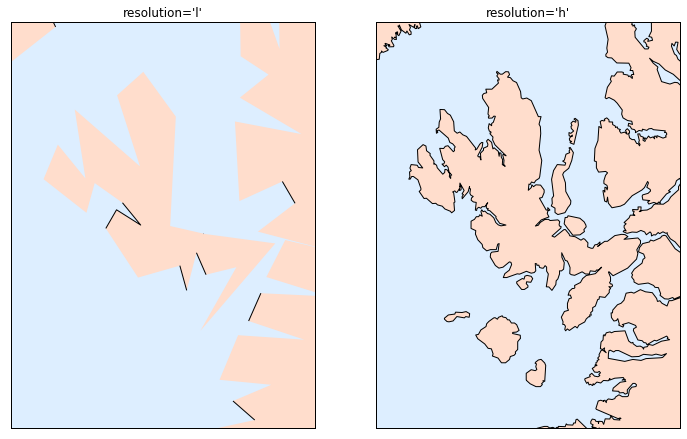

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']): # 低分辨率和高分辨率
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2, # 球心投射
                width=90000, height=120000, resolution=res, ax=ax[i]) # 绘制在相应的子图表中
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF') # 陆地填充色和湖泊填充色
    m.drawmapboundary(fill_color="#DDEEFF") # 海洋填充色
    m.drawcoastlines() # 绘制海岸线
    ax[i].set_title("resolution='{0}'".format(res));

> Notice that the low-resolution coastlines are not suitable for this level of zoom, while high-resolution works just fine.
The low level would work just fine for a global view, however, and would be *much* faster than loading the high-resolution border data for the entire globe!
It might require some experimentation to find the correct resolution parameter for a given view: the best route is to start with a fast, low-resolution plot and increase the resolution as needed.

你可以看到左图的低分辨率图像显然不适合这个比例的地图展示，而高分辨率图像正适合。低分辨率适合在全球级别的地图中使用，而且它也会比高分辨率设置*快很多*。对于某个地图适合使用哪种分辨率可能需要一些实验：最好的办法是首先采用快速的低分辨率图像，然后根据需要增加分辨率。

## Plotting Data on Maps

## 在地图上绘制数据

> Perhaps the most useful piece of the Basemap toolkit is the ability to over-plot a variety of data onto a map background.
For simple plotting and text, any ``plt`` function works on the map; you can use the ``Basemap`` instance to project latitude and longitude coordinates to ``(x, y)`` coordinates for plotting with ``plt``, as we saw earlier in the Seattle example.

Basemap工具集提供的最有用的功能应该是允许用户在地图背景上绘制数据图表的能力。对于简单绘图和文字来说，所有的`plt`函数都可以在地图上良好工作；你可以使用`Basemap`实例将经纬度坐标投射成`(x, y)`坐标，然后使用`plt`进行绘制，就像我们前面在西雅图例子中见到的那样。

> In addition to this, there are many map-specific functions available as methods of the ``Basemap`` instance.
These work very similarly to their standard Matplotlib counterparts, but have an additional Boolean argument ``latlon``, which if set to ``True`` allows you to pass raw latitudes and longitudes to the method, rather than projected ``(x, y)`` coordinates.

除此之外，`Basemap`实例还提供了很多地图相关的函数。这些函数的使用方式非常类似于它们的Matplotlib对应函数，但是都接收一个额外的布尔参数`latlon`，当设置为`True`时允许你传递原始经纬度坐标给函数，而不是映射后的`(x, y)`坐标。

> Some of these map-specific methods are:

部分的地图相关方法有：

- ``contour()``/``contourf()`` : 绘制轮廓线或填充轮廓
- ``imshow()``: 绘制图像
- ``pcolor()``/``pcolormesh()`` : 绘制伪彩色的网格
- ``plot()``: 绘制线条和刻度
- ``scatter()``: 绘制散点和刻度
- ``quiver()``: 绘制向量
- ``barbs()``: 绘制风羽图
- ``drawgreatcircle()``: 绘制大圆

> We'll see some examples of a few of these as we continue.
For more information on these functions, including several example plots, see the [online Basemap documentation](http://matplotlib.org/basemap/).

我们后续会在例子中看到其中一些函数。要获得这些函数的更多资料和例子图表，参见[在线Basemap文档](http://matplotlib.org/basemap/)。

## Example: California Cities

## 例子：加利福利亚城市

> Recall that in [Customizing Plot Legends](04.06-Customizing-Legends.ipynb), we demonstrated the use of size and color in a scatter plot to convey information about the location, size, and population of California cities.
Here, we'll create this plot again, but using Basemap to put the data in context.

我们在[自定义图表图例](04.06-Customizing-Legends.ipynb)展示使用散点的大小和颜色绘制涵盖了加利福利亚位置、面积和人口信息图表的方法。下面我们再次绘制这个图表，但是使用Basemap将数据展示在地图上。

> We start with loading the data, as we did before:

首先载入数据：

In [10]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# 将我们需要的数据列提取出来
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

> Next, we set up the map projection, scatter the data, and then create a colorbar and legend:

然后我们设置地图映射方式，将数据散点绘制出来，并创建颜色条和图例：

/home/wangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/home/wangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/wangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


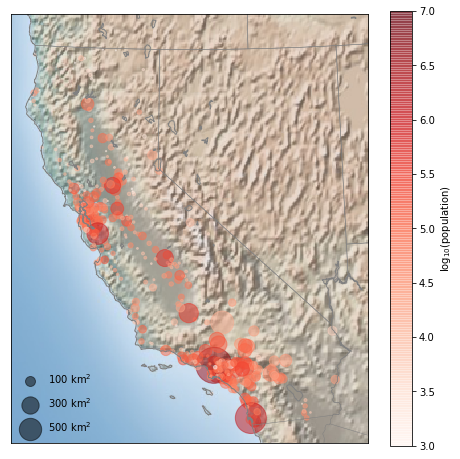

In [11]:
# 1. 绘制地图背景
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', # 兰伯特等角圆锥投射，高分辨率
            lat_0=37.5, lon_0=-119, # 加利福利亚经纬度
            width=1E6, height=1.2E6) # 展示大小 1000000 × 1200000 千米
m.shadedrelief() # 阴影浮雕效果
m.drawcoastlines(color='gray') # 绘制海岸线
m.drawcountries(color='gray') # 绘制国境线
m.drawstates(color='gray') # 绘制州边界线

# 2. 城市数据散点绘制，颜色表示人口，大小表示面积
m.scatter(lon, lat, latlon=True, # latlon设置为True，使用原始经纬度数据
          c=np.log10(population), s=area, # 颜色设置为人口的常用对数，大小设置为城市面积
          cmap='Reds', alpha=0.5)

# 3. 绘制颜色条及刻度
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 绘制图例和刻度
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

> This shows us roughly where larger populations of people have settled in California: they are clustered near the coast in the Los Angeles and San Francisco areas, stretched along the highways in the flat central valley, and avoiding almost completely the mountainous regions along the borders of the state.

上图给我们展示了加利福利亚州大概的人口分布情况：基本上聚集在海岸线边缘的洛杉矶和旧金山区域附近，并且两者沿着中间的平坦山谷地带延伸，在州界沿线的山地区域很少人居聚集。

## Example: Surface Temperature Data

## 例子：表面温度数据

> As an example of visualizing some more continuous geographic data, let's consider the "polar vortex" that hit the eastern half of the United States in January of 2014.
A great source for any sort of climatic data is [NASA's Goddard Institute for Space Studies](http://data.giss.nasa.gov/).
Here we'll use the GIS 250 temperature data, which we can download using shell commands (these commands may have to be modified on Windows machines).
The data used here was downloaded on 6/12/2016, and the file size is approximately 9MB:

下面我们使用2014年一月侵袭了半个美国东部地区的极地涡旋现象来作为例子说明更加连续性的地理数据可视化方法。气象数据的一个非常优秀的来源是[NASA戈达德太空研究所](http://data.giss.nasa.gov/)。这里我们会采用GIS 250温度数据，我们可以使用shell命令来下载（windows用户可能需要修改相应命令）。本书使用的数据是在2016年6月12日下载的，文件大小大约9MB：

译者注：该数据文件在下面的地址已经无法找到，可以到https://www.kompulsa.com/climate-data-mirror/ 镜像站点进行下载，本仓库也直接在notebooks/data目录下提供了bzip2压缩包，直接解压可用。下面的读取数据路径相应修改为data/gistemp250.nc。

In [12]:
# !curl -O http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
# !gunzip gistemp250.nc.gz

> The data comes in NetCDF format, which can be read in Python by the ``netCDF4`` library.
You can install this library as shown here

数据使用了NetCDF格式，使用Python的`netCDF4`库可以对该格式进行操作。使用下面的命令能安装该软件包：

```
$ conda install netcdf4
```

> We read the data as follows:

然后读取整个数据集：

In [13]:
from netCDF4 import Dataset
data = Dataset('data/gistemp250.nc')

> The file contains many global temperature readings on a variety of dates; we need to select the index of the date we're interested in—in this case, January 15, 2014:

文件含有很多不同日期的全球温度数据；我们需要从中选出我们感兴趣的那天，本例中是2014年1月15日：

In [14]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

> Now we can load the latitude and longitude data, as well as the temperature anomaly for this index:

现在我们能够读取经纬度数据了，当然不能缺少的是这个日期的异常温度数据：

In [15]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

> Finally, we'll use the ``pcolormesh()`` method to draw a color mesh of the data.
We'll look at North America, and use a shaded relief map in the background.
Note that for this data we specifically chose a divergent colormap, which has a neutral color at zero and two contrasting colors at negative and positive values.
We'll also lightly draw the coastlines over the colors for reference:

最后，我们使用`pcolormesh()`函数来绘制数据网格的颜色。我们观察的是北美地区，使用阴影浮雕地图作为背景。并且我们特别选择了一种二分的色图来展现数据，这样零值时会是一种中立颜色，而两端是两种对比色分别表示正值和负值。我们还会在色块之上使用淡色绘制出海岸线作为参考：

/home/wangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


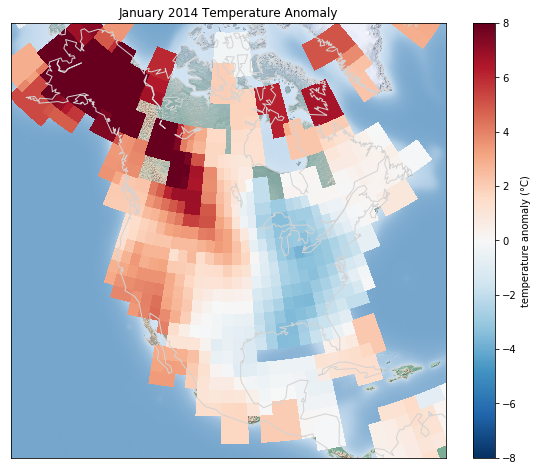

In [16]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c', # 兰伯特等角圆锥映射，边界线粗糙
            width=8E6, height=8E6, # 地图大小 8000000 × 8000000 千米
            lat_0=45, lon_0=-100,) # 映射中心经纬度
m.shadedrelief(scale=0.5) # 阴影浮雕
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r') # 绘制数据网格颜色
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray') # 绘制海岸线

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

> The data paints a picture of the localized, extreme temperature anomalies that happened during that month.
The eastern half of the United States was much colder than normal, while the western half and Alaska were much warmer.
Regions with no recorded temperature show the map background.

上图绘制了北美地区在那个月中的极端异常温度数据情况。整个美东地区比正常情况温度低了许多，而美西地区及阿拉斯加却比正常情况暖和了许多。没有记录的温度数据区域图中显示的是地图的背景。

<!--NAVIGATION-->
< [在matplotlib中创建三维图表](04.12-Three-Dimensional-Plotting.ipynb) | [目录](Index.ipynb) | [使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
